# IPL SEASON 18 (POWERPLAY ANALYSIS)

Importing necessary Python libraries.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Optional settings
plt.style.use("default")
pd.set_option("display.max_columns", None)

Importing data and checking data

In [48]:
df = pd.read_csv("ipl2025.csv")


df.head()

,match_no,date,stage,venue,batting_team,bowling_team,innings,over,striker,bowler,bowler_type,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.1,de Kock,Hazlewood,pace,0,0,0,0,0,0,NaN,NaN,NaN
1,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.2,de Kock,Hazlewood,pace,4,0,0,0,0,0,NaN,NaN,NaN
2,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.3,de Kock,Hazlewood,pace,0,0,0,0,0,0,NaN,NaN,NaN
3,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.4,de Kock,Hazlewood,pace,0,0,0,0,0,0,NaN,NaN,NaN
4,1,"Mar 22, 2025",League stage,"Eden Gardens, Kolkata",KKR,RCB,1,0.5,de Kock,Hazlewood,pace,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [49]:
df.columns

Index(['match_no', 'date', 'stage', 'venue', 'batting_team', 'bowling_team',
       'innings', 'over', 'striker', 'bowler', 'bowler_type', 'runs_of_bat',
       'extras', 'wide', 'legbyes', 'byes', 'noballs', 'wicket_type',
       'player_dismissed', 'fielder'],
      dtype='object')

In [50]:
powerplay_match1 = df[
    (df["match_no"] == 1) &
    (df["over"] < 6)
]

powerplay_runs_by_innings = (
    powerplay_match1
    .assign(total_runs = powerplay_match1["runs_of_bat"] + powerplay_match1["extras"])
    .groupby("innings")["total_runs"]
    .sum()
)

powerplay_runs_by_innings


innings
1    60
2    80
Name: total_runs, dtype: int64

## Total POWERPLAY RUNS during League stages 

In [51]:
import pandas as pd


df = pd.read_csv("ipl2025.csv")

DEFAULT_PP_OVERS = 6

pp_overs = {
    34: 4
}

df = df.copy()

df = df[df["match_no"] <= 70].copy()

def get_pp_overs(match_no):
    return pp_overs.get(match_no, DEFAULT_PP_OVERS)

df["pp_overs"] = df["match_no"].apply(get_pp_overs)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()

powerplay_df["total_runs"] = (
    powerplay_df["runs_of_bat"] + powerplay_df["extras"]
)

powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

team_powerplay_runs = (
    powerplay_df
    .groupby("batting_team")
    .agg(
        total_powerplay_runs=("total_runs", "sum"),
        innings_count=("match_innings", "nunique")
    )
    .sort_values(by="total_powerplay_runs", ascending=False)
)

team_powerplay_runs



,total_powerplay_runs,innings_count
batting_team,,
RR,911,14
PBKS,829,14
MI,789,14
LSG,783,14
GT,764,14
SRH,760,13
RCB,759,13
DC,734,14
CSK,731,14


## visualization on Powerplay runs

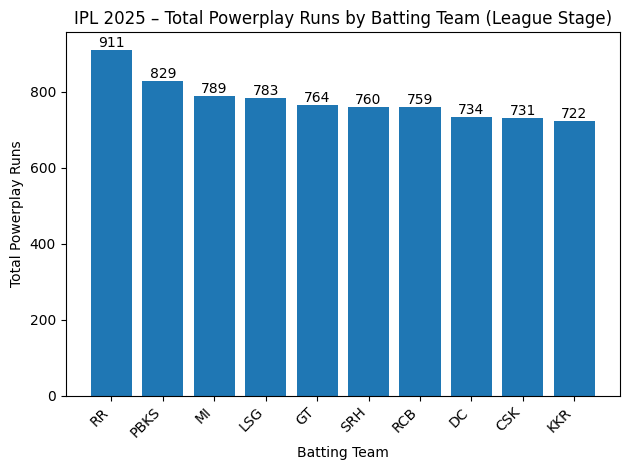

In [52]:
import matplotlib.pyplot as plt

plt.figure()

bars = plt.bar(
    team_powerplay_runs.index,
    team_powerplay_runs["total_powerplay_runs"]
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Total Powerplay Runs")
plt.title("IPL 2025 – Total Powerplay Runs by Batting Team (League Stage)")

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h,
        f"{int(h)}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


## Average Powerplay runs

In [53]:
import pandas as pd

df = pd.read_csv("ipl2025.csv")

df = df.copy()

df = df[df["match_no"] <= 70].copy()

# Total runs per ball
powerplay_df["total_runs"] = (
    powerplay_df["runs_of_bat"] + powerplay_df["extras"]
)

# Unique innings identifier
powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

# Aggregate by team
avg_powerplay_runs = (
    powerplay_df
    .groupby("batting_team")
    .agg(
        total_powerplay_runs=("total_runs", "sum"),
        innings_count=("match_innings", "nunique")
    )
)

# Average powerplay runs per innings
avg_powerplay_runs["avg_powerplay_runs"] = (
    avg_powerplay_runs["total_powerplay_runs"] /
    avg_powerplay_runs["innings_count"]
).round(2)

# Sort
avg_powerplay_runs = avg_powerplay_runs.sort_values(
    by="avg_powerplay_runs",
    ascending=False
)

avg_powerplay_runs


,total_powerplay_runs,innings_count,avg_powerplay_runs
batting_team,,,
RR,911,14,65.07
PBKS,829,14,59.21
SRH,760,13,58.46
RCB,759,13,58.38
MI,789,14,56.36
LSG,783,14,55.93
KKR,722,13,55.54
GT,764,14,54.57
DC,734,14,52.43


## Vizualization of Average Powerplay runs

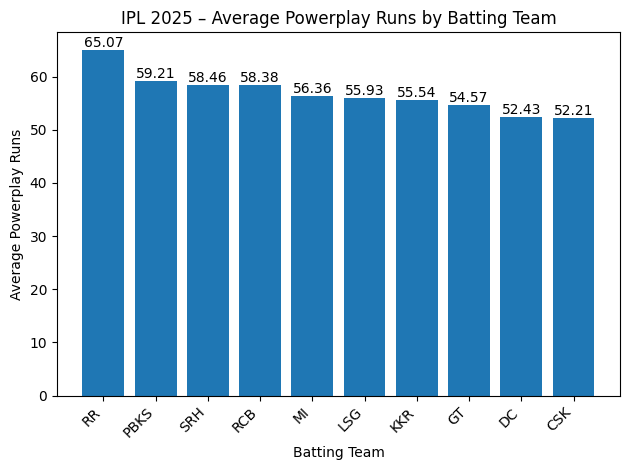

In [54]:
import matplotlib.pyplot as plt

plt.figure()

bars = plt.bar(
    avg_powerplay_runs.index,
    avg_powerplay_runs["avg_powerplay_runs"]
)

plt.xlabel("Batting Team")
plt.ylabel("Average Powerplay Runs")
plt.title("IPL 2025 – Average Powerplay Runs by Batting Team")
plt.xticks(rotation=45, ha="right")

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


## Average Dot-Balls

In [55]:
import pandas as pd

df = pd.read_csv("ipl2025.csv")

df = df.copy()

df = df[df["match_no"] <= 70].copy()


DEFAULT_PP_OVERS = 6
PP_OVERS_OVERRIDE = {34: 4}

df["pp_overs"] = df["match_no"].apply(
    lambda x: PP_OVERS_OVERRIDE.get(x, DEFAULT_PP_OVERS)
)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()

powerplay_df["legal_ball"] = (
    (powerplay_df["wide"] == 0) &
    (powerplay_df["noballs"] == 0)
).astype(int)

powerplay_df["dot_ball"] = (
    (powerplay_df["runs_of_bat"] == 0) &
    (powerplay_df["extras"] == 0) &
    (powerplay_df["legal_ball"] == 1)
).astype(int)

team_dot_stats = (
    powerplay_df
    .groupby("batting_team")
    .agg(
        total_dot_balls=("dot_ball", "sum"),
        total_balls=("legal_ball", "sum")
    )
    .reset_index()
)

team_dot_stats["dot_ball_pct"] = (
    team_dot_stats["total_dot_balls"] /
    team_dot_stats["total_balls"] * 100
).round(2)

team_dot_stats = team_dot_stats.sort_values(
    by="dot_ball_pct",
    ascending=False
)

team_dot_stats





,batting_team,total_dot_balls,total_balls,dot_ball_pct
3,KKR,195,438,44.52
5,MI,216,504,42.86
0,CSK,215,504,42.66
8,RR,214,504,42.46
4,LSG,213,504,42.26
1,DC,212,504,42.06
9,SRH,196,468,41.88
6,PBKS,191,492,38.82
7,RCB,173,456,37.94
2,GT,179,504,35.52


## Visualization of average dot-balls

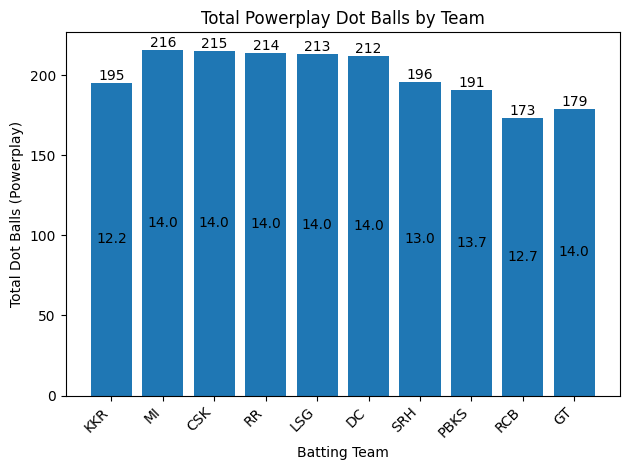

In [56]:
import matplotlib.pyplot as plt

teams = team_dot_stats["batting_team"]
dot_balls = team_dot_stats["total_dot_balls"]
innings = (team_dot_stats["total_balls"] / 36).round(1)

plt.figure()
bars = plt.bar(teams, dot_balls)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Total Dot Balls (Powerplay)")
plt.title("Total Powerplay Dot Balls by Team")

for bar, dots, inns in zip(bars, dot_balls, innings):
    height = bar.get_height()
    
    # Dot balls on top
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(dots)}",
        ha="center",
        va="bottom"
    )
    
    # Innings inside bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.5,
        f"{inns}",
        ha="center",
        va="center"
    )

plt.tight_layout()
plt.show()



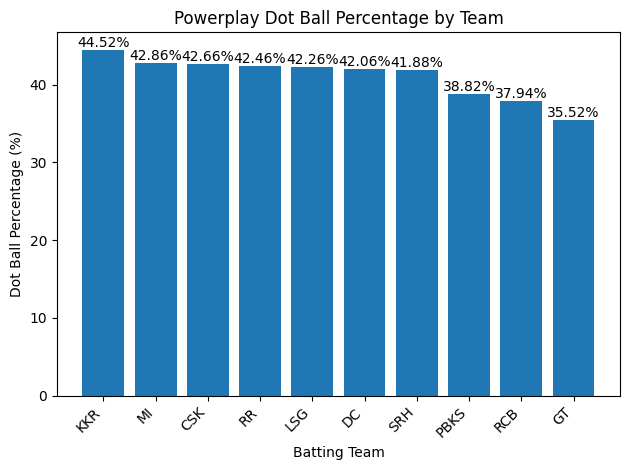

In [57]:
plt.figure()
bars = plt.bar(
    team_dot_stats["batting_team"],
    team_dot_stats["dot_ball_pct"]
)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Dot Ball Percentage (%)")
plt.title("Powerplay Dot Ball Percentage by Team")

for bar, pct in zip(bars, team_dot_stats["dot_ball_pct"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{pct}%",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


## Sixes during powerplay

In [58]:
import pandas as pd

# -----------------------------------------------------
# CONFIG
# -----------------------------------------------------
df = pd.read_csv("ipl2025.csv")
df = df[df["match_no"] <= 70].copy()

DEFAULT_PP_OVERS = 6
PP_OVERS_OVERRIDE = {34: 4}

# df must already be loaded
# df = pd.read_excel("ball_by_ball.xlsx")

# -----------------------------------------------------
# POWERPLAY FILTER (MATCH-SPECIFIC)
# -----------------------------------------------------

df["pp_overs"] = df["match_no"].apply(
    lambda x: PP_OVERS_OVERRIDE.get(x, DEFAULT_PP_OVERS)
)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()

# -----------------------------------------------------
# SIXES LOGIC
# -----------------------------------------------------

powerplay_df["six"] = (powerplay_df["runs_of_bat"] == 6).astype(int)

powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

# Sixes per team per innings
sixes_per_innings = (
    powerplay_df
    .groupby(["batting_team", "match_innings"])["six"]
    .sum()
    .reset_index(name="sixes")
)

# -----------------------------------------------------
# TEAM-LEVEL AGGREGATION
# -----------------------------------------------------

six_stats = (
    sixes_per_innings
    .groupby("batting_team")
    .agg(
        total_sixes=("sixes", "sum"),
        avg_sixes=("sixes", "mean"),
        innings=("match_innings", "nunique")
    )
    .reset_index()
)

six_stats["avg_sixes"] = six_stats["avg_sixes"].round(2)

# -----------------------------------------------------
# SORT + RANK (1 TO N)
# -----------------------------------------------------

six_stats = six_stats.sort_values(
    by="avg_sixes",
    ascending=False
).reset_index(drop=True)

six_stats.insert(
    0,
    "rank",
    range(1, len(six_stats) + 1)
)

# -----------------------------------------------------
# SEQUENTIAL NORMALIZATION (1 → 0)
# -----------------------------------------------------

n = len(six_stats)

six_stats["avg_sixes_seq_norm"] = (
    1 - ((six_stats["rank"] - 1) / (n - 1))
).round(2)

# -----------------------------------------------------
# FINAL OUTPUT
# -----------------------------------------------------

six_stats


,rank,batting_team,total_sixes,avg_sixes,innings,avg_sixes_seq_norm
0,1,RR,57,4.07,14,1.00
1,2,KKR,43,3.31,13,0.89
2,3,LSG,41,2.93,14,0.78
3,4,PBKS,40,2.86,14,0.67
4,5,MI,39,2.79,14,0.56
5,6,RCB,29,2.23,13,0.44
6,7,SRH,26,2.00,13,0.33
7,8,GT,25,1.79,14,0.22
8,9,DC,24,1.71,14,0.11
9,10,CSK,19,1.36,14,0.00


## Vizualization of number of sixes

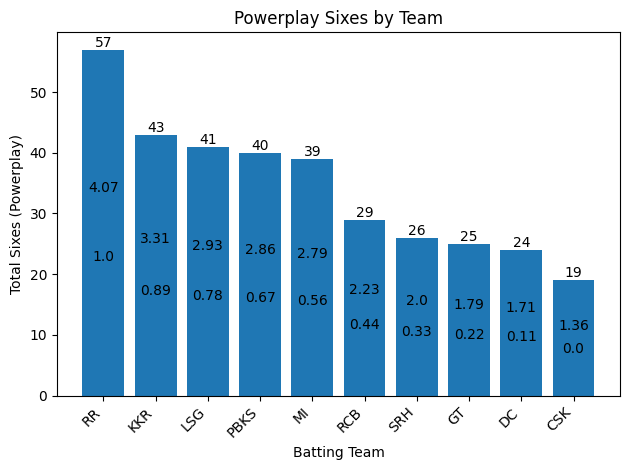

In [59]:
import matplotlib.pyplot as plt

teams = six_stats["batting_team"]
total_sixes = six_stats["total_sixes"]
avg_sixes = six_stats["avg_sixes"]
avg_norm = six_stats["avg_sixes_seq_norm"]

plt.figure()
bars = plt.bar(teams, total_sixes)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Total Sixes (Powerplay)")
plt.title("Powerplay Sixes by Team")

for bar, total, avg, norm in zip(bars, total_sixes, avg_sixes, avg_norm):
    height = bar.get_height()

    # Total sixes on top
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(total)}",
        ha="center",
        va="bottom"
    )

    # Average sixes inside bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.6,
        f"{avg}",
        ha="center",
        va="center"
    )

    # Sequential norm inside bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.4,
        f"{norm}",
        ha="center",
        va="center"
    )

plt.tight_layout()
plt.show()


## Number of innings without hitting a six in powerplay

In [60]:
import pandas as pd

df = pd.read_csv("ipl2025.csv")
df = df[df["match_no"] <= 70].copy()

DEFAULT_PP_OVERS = 6
PP_OVERS_OVERRIDE = {34: 4}

df["pp_overs"] = df["match_no"].apply(
    lambda x: PP_OVERS_OVERRIDE.get(x, DEFAULT_PP_OVERS)
)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()

powerplay_df["six"] = (powerplay_df["runs_of_bat"] == 6).astype(int)

powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

# Sixes per innings
sixes_per_innings = (
    powerplay_df
    .groupby(["batting_team", "match_innings"])["six"]
    .sum()
    .reset_index(name="sixes")
)

# Total innings per team
innings_per_team = (
    sixes_per_innings
    .groupby("batting_team")["match_innings"]
    .nunique()
    .reset_index(name="innings")
)

# Zero-six innings
zero_six_counts = (
    sixes_per_innings[sixes_per_innings["sixes"] == 0]
    .groupby("batting_team")
    .size()
    .reset_index(name="zero_six_powerplay_innings")
)

# Merge and fill missing teams with 0
zero_six_stats = (
    innings_per_team
    .merge(zero_six_counts, on="batting_team", how="left")
    .fillna(0)
)

zero_six_stats["zero_six_powerplay_innings"] = (
    zero_six_stats["zero_six_powerplay_innings"].astype(int)
)

# Optional percentage
zero_six_stats["zero_six_pct"] = (
    zero_six_stats["zero_six_powerplay_innings"] /
    zero_six_stats["innings"] * 100
).round(2)

# Sort (optional)
zero_six_stats = zero_six_stats.sort_values(
    by="zero_six_powerplay_innings",
    ascending=False
).reset_index(drop=True)

zero_six_stats



,batting_team,innings,zero_six_powerplay_innings,zero_six_pct
0,CSK,14,6,42.86
1,SRH,13,3,23.08
2,DC,14,2,14.29
3,GT,14,2,14.29
4,RCB,13,2,15.38
5,KKR,13,1,7.69
6,PBKS,14,1,7.14
7,LSG,14,1,7.14
8,MI,14,0,0.00
9,RR,14,0,0.00


## Vizualization of the data

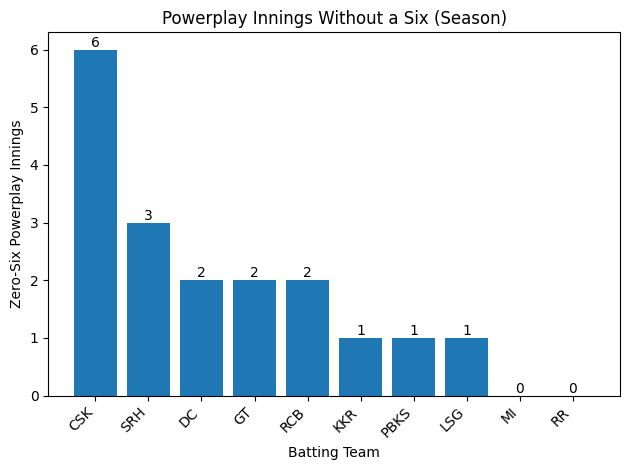

In [61]:
import matplotlib.pyplot as plt

teams = zero_six_stats["batting_team"]
zero_six = zero_six_stats["zero_six_powerplay_innings"]
pct = zero_six_stats["zero_six_pct"]

plt.figure()
bars = plt.bar(teams, zero_six)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Zero-Six Powerplay Innings")
plt.title("Powerplay Innings Without a Six (Season)")

for bar, z, p in zip(bars, zero_six, pct):
    height = bar.get_height()

    # Zero-six count on top
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(z)}",
        ha="center",
        va="bottom"
    )



plt.tight_layout()
plt.show()


## fours in powerplay

In [62]:
# -----------------------------------------------------
# POWERPLAY FILTER (ASSUMED ALREADY CORRECT)
# powerplay_df must already be created using pp_overs logic
# -----------------------------------------------------
df = pd.read_csv("ipl2025.csv")
df = df[df["match_no"] <= 70].copy()

# Identify fours
powerplay_df["four"] = (powerplay_df["runs_of_bat"] == 4).astype(int)

# Unique innings identifier
powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

# Fours per team per innings (including zeros)
fours_per_innings = (
    powerplay_df
    .groupby(["batting_team", "match_innings"])["four"]
    .sum()
    .reset_index(name="fours")
)

# Team-level aggregation
four_stats = (
    fours_per_innings
    .groupby("batting_team")
    .agg(
        total_fours=("fours", "sum"),
        avg_fours=("fours", "mean"),
        innings=("match_innings", "nunique")
    )
    .reset_index()
)

four_stats["avg_fours"] = four_stats["avg_fours"].round(2)

# Sort by average fours
four_stats = four_stats.sort_values(
    by="avg_fours",
    ascending=False
).reset_index(drop=True)

# Rank (1 = highest avg fours)
four_stats.insert(
    0,
    "rank",
    range(1, len(four_stats) + 1)
)

# Sequential normalization (1 → 0)
n = len(four_stats)
four_stats["avg_fours_seq_norm"] = (
    1 - ((four_stats["rank"] - 1) / (n - 1))
).round(2)

four_stats



,rank,batting_team,total_fours,avg_fours,innings,avg_fours_seq_norm
0,1,SRH,95,7.31,13,1.00
1,2,RCB,93,7.15,13,0.89
2,3,RR,98,7.00,14,0.78
3,4,CSK,95,6.79,14,0.67
4,5,PBKS,91,6.50,14,0.56
5,6,DC,89,6.36,14,0.44
6,7,MI,86,6.14,14,0.33
7,8,GT,86,6.14,14,0.22
8,9,KKR,73,5.62,13,0.11
9,10,LSG,75,5.36,14,0.00


## Vizualization of the data

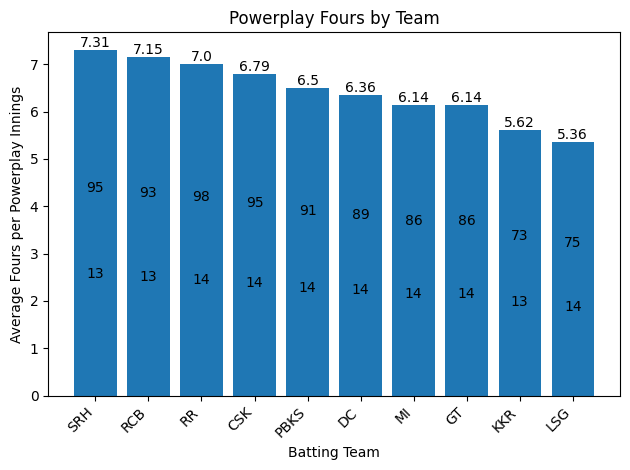

In [63]:
import matplotlib.pyplot as plt

teams = four_stats["batting_team"]
avg_fours = four_stats["avg_fours"]
total_fours = four_stats["total_fours"]
innings = four_stats["innings"]

plt.figure()
bars = plt.bar(teams, avg_fours)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Average Fours per Powerplay Innings")
plt.title("Powerplay Fours by Team")

for bar, avg, total, inns in zip(bars, avg_fours, total_fours, innings):
    height = bar.get_height()

    # Average fours on top
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{avg}",
        ha="center",
        va="bottom"
    )

    # Total fours inside bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.6,
        f"{int(total)}",
        ha="center",
        va="center"
    )

    # Innings below total fours (inside bar)
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.35,
        f"{int(inns)}",
        ha="center",
        va="center"
    )

plt.tight_layout()
plt.show()


## Boundries in powerplay(4's and 6's)

In [64]:
# Identify boundaries (4s or 6s)
powerplay_df["boundary"] = powerplay_df["runs_of_bat"].isin([4, 6]).astype(int)

df = pd.read_csv("ipl2025.csv")
df = df[df["match_no"] <= 70].copy()

# Unique innings identifier
powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

# Boundaries per team per innings (including zeros)
boundaries_per_innings = (
    powerplay_df
    .groupby(["batting_team", "match_innings"])["boundary"]
    .sum()
    .reset_index(name="boundaries")
)

# Team-level totals and averages
boundary_stats = (
    boundaries_per_innings
    .groupby("batting_team")
    .agg(
        total_boundaries=("boundaries", "sum"),
        avg_boundaries=("boundaries", "mean"),
        innings=("match_innings", "nunique")
    )
    .reset_index()
)

boundary_stats["avg_boundaries"] = boundary_stats["avg_boundaries"].round(2)

# boundary_stats is assumed to be already created

# Sort by average boundaries (descending)
boundary_stats = boundary_stats.sort_values(
    by="avg_boundaries",
    ascending=False
).reset_index(drop=True)

# Add rank (1 = highest avg boundaries)
boundary_stats.insert(
    0,
    "rank",
    range(1, len(boundary_stats) + 1)
)


boundary_stats



,rank,batting_team,total_boundaries,avg_boundaries,innings
0,1,RR,155,11.07,14
1,2,RCB,122,9.38,13
2,3,PBKS,131,9.36,14
3,4,SRH,121,9.31,13
4,5,MI,125,8.93,14
5,6,KKR,116,8.92,13
6,7,LSG,116,8.29,14
7,8,CSK,114,8.14,14
8,9,DC,113,8.07,14
9,10,GT,111,7.93,14


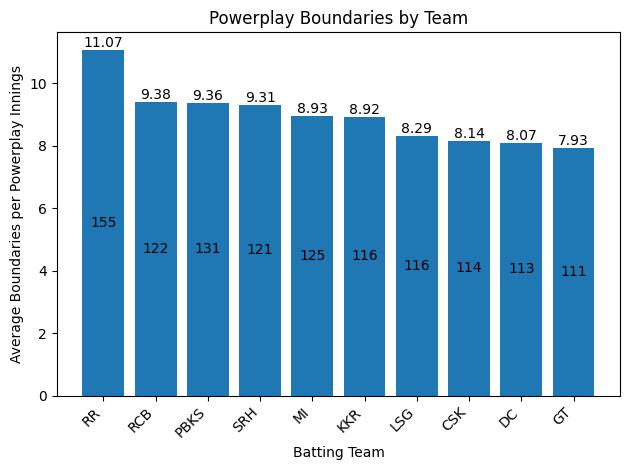

In [65]:
import matplotlib.pyplot as plt

teams = boundary_stats["batting_team"]
avg_boundaries = boundary_stats["avg_boundaries"]
total_boundaries = boundary_stats["total_boundaries"]

plt.figure()
bars = plt.bar(teams, avg_boundaries)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Average Boundaries per Powerplay Innings")
plt.title("Powerplay Boundaries by Team")

for bar, avg, total in zip(bars, avg_boundaries, total_boundaries):
    height = bar.get_height()

    # Average boundaries on top
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{avg}",
        ha="center",
        va="bottom"
    )

    # Total boundaries inside bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height * 0.5,
        f"{int(total)}",
        ha="center",
        va="center"
    )

plt.tight_layout()
plt.show()



## Strike rate

In [66]:
import pandas as pd

df = pd.read_csv("ipl2025.csv")
df = df[df["match_no"] <= 70].copy()

DEFAULT_PP_OVERS = 6
PP_OVERS_OVERRIDE = {34: 4}

#
df["pp_overs"] = df["match_no"].apply(
    lambda x: PP_OVERS_OVERRIDE.get(x, DEFAULT_PP_OVERS)
)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()


powerplay_df = powerplay_df[
    (powerplay_df["wide"] == 0) &
    (powerplay_df["noballs"] == 0)
].copy()

#
powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)


innings_sr = (
    powerplay_df
    .groupby(["batting_team", "match_innings"])
    .agg(
        runs=("runs_of_bat", "sum"),
        balls=("runs_of_bat", "count")
    )
    .reset_index()
)

# ---------------------------------------------
# STRIKE RATE PER INNINGS
# ---------------------------------------------

innings_sr["strike_rate"] = (
    innings_sr["runs"] / innings_sr["balls"] * 100
)

# ---------------------------------------------
# SEASON-WIDE AVERAGE (TEAM LEVEL)
# ---------------------------------------------

avg_powerplay_sr = (
    innings_sr
    .groupby("batting_team")["strike_rate"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

avg_powerplay_sr



batting_team
RR      174.40
PBKS    160.52
RCB     154.70
MI      150.79
KKR     150.00
SRH     149.79
LSG     147.42
GT      146.43
DC      137.70
CSK     137.30
Name: strike_rate, dtype: float64

## Vizualization of the data

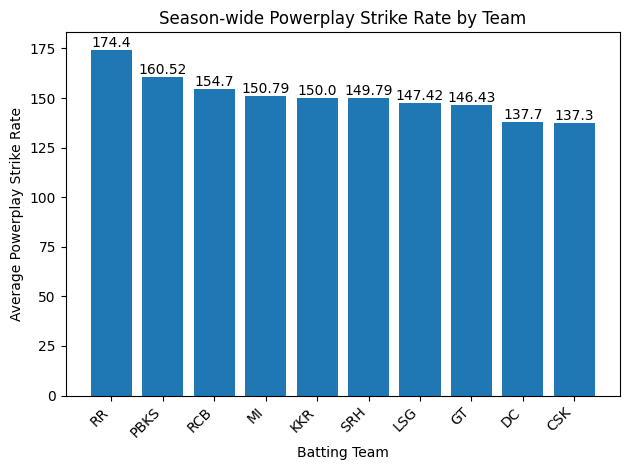

In [67]:
import matplotlib.pyplot as plt

teams = avg_powerplay_sr.index
sr_values = avg_powerplay_sr.values

plt.figure()
bars = plt.bar(teams, sr_values)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Average Powerplay Strike Rate")
plt.title("Season-wide Powerplay Strike Rate by Team")

for bar, sr in zip(bars, sr_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{sr}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()


## Strike rake vs spin

In [68]:
import pandas as pd

df = pd.read_csv("ipl2025.csv")

df = df[df["match_no"] <= 70].copy()

DEFAULT_PP_OVERS = 6
PP_OVERS_OVERRIDE = {34: 4}

df["pp_overs"] = df["match_no"].apply(
    lambda x: PP_OVERS_OVERRIDE.get(x, DEFAULT_PP_OVERS)
)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()

powerplay_df["bowler_type"] = (
    powerplay_df["bowler_type"].astype(str).str.lower()
)

powerplay_df = powerplay_df[
    (powerplay_df["bowler_type"].str.contains("spin", na=False)) &
    (powerplay_df["wide"] == 0) &
    (powerplay_df["noballs"] == 0)
].copy()

powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

spin_innings = (
    powerplay_df
    .groupby(["batting_team", "match_innings"])
    .agg(
        runs=("runs_of_bat", "sum"),
        balls=("runs_of_bat", "count")
    )
    .reset_index()
)

spin_innings["pp_sr_vs_spin"] = (
    spin_innings["runs"] / spin_innings["balls"] * 100
)

pp_sr_vs_spin = (
    spin_innings
    .groupby("batting_team")["pp_sr_vs_spin"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

pp_sr_vs_spin





batting_team
RR      194.05
RCB     188.89
KKR     171.30
GT      164.93
PBKS    145.14
DC      142.71
CSK     142.28
SRH     140.08
LSG     133.61
MI      121.67
Name: pp_sr_vs_spin, dtype: float64

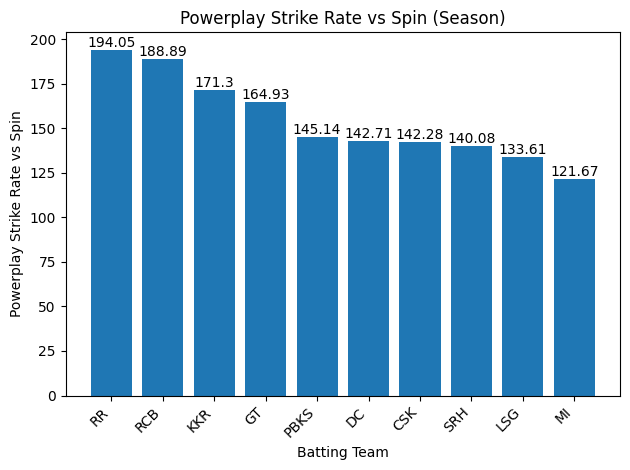

In [69]:
import matplotlib.pyplot as plt

teams = pp_sr_vs_spin.index
values = pp_sr_vs_spin.values

plt.figure()
bars = plt.bar(teams, values)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Powerplay Strike Rate vs Spin")
plt.title("Powerplay Strike Rate vs Spin (Season)")

for bar, val in zip(bars, values):
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h,
        f"{val}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()




## Strike rate vs pace

In [70]:
import pandas as pd

df = pd.read_csv("ipl2025.csv")
df = df[df["match_no"] <= 70].copy()  

DEFAULT_PP_OVERS = 6
PP_OVERS_OVERRIDE = {34: 4}

df["pp_overs"] = df["match_no"].apply(
    lambda x: PP_OVERS_OVERRIDE.get(x, DEFAULT_PP_OVERS)
)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()

powerplay_df["bowler_type"] = (
    powerplay_df["bowler_type"].astype(str).str.lower()
)

powerplay_df = powerplay_df[
    (powerplay_df["bowler_type"].str.contains("pace|fast|seam", na=False)) &
    (powerplay_df["wide"] == 0) &
    (powerplay_df["noballs"] == 0)
].copy()

if powerplay_df.empty:
    raise ValueError("No pace deliveries found in powerplay.")

powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

pace_innings = (
    powerplay_df
    .groupby(["batting_team", "match_innings"])
    .agg(
        runs=("runs_of_bat", "sum"),
        balls=("runs_of_bat", "count")
    )
    .reset_index()
)

pace_innings["strike_rate_vs_pace"] = (
    pace_innings["runs"] / pace_innings["balls"] * 100
)

avg_sr_vs_pace = (
    pace_innings
    .groupby("batting_team")["strike_rate_vs_pace"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

avg_sr_vs_pace



batting_team
RR      175.91
PBKS    161.11
MI      156.29
LSG     156.23
SRH     155.66
RCB     152.78
KKR     147.74
GT      144.11
DC      138.77
CSK     138.65
Name: strike_rate_vs_pace, dtype: float64

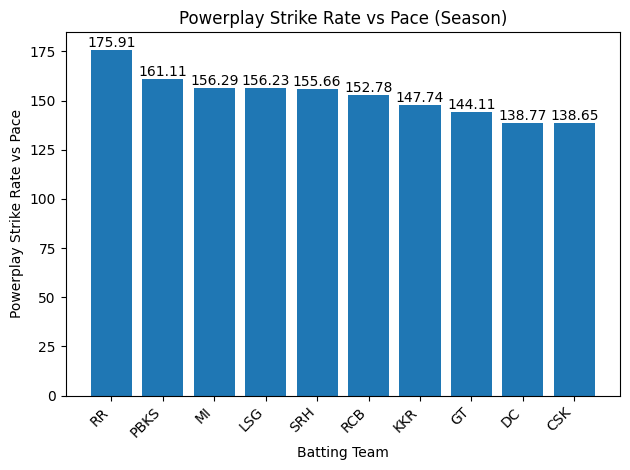

In [71]:
import matplotlib.pyplot as plt

teams = avg_sr_vs_pace.index
sr_values = avg_sr_vs_pace.values

plt.figure()
bars = plt.bar(teams, sr_values)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Powerplay Strike Rate vs Pace")
plt.title("Powerplay Strike Rate vs Pace (Season)")

for bar, sr in zip(bars, sr_values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{sr}",
        ha="center",
        va="bottom"
    )

plt.tight_layout()
plt.show()




## wickets lost in powerplay

In [72]:
import pandas as pd

df = pd.read_csv("ipl2025.csv")
df = df[df["match_no"] <= 70].copy()

DEFAULT_PP_OVERS = 6
PP_OVERS_OVERRIDE = {34: 4}

df["pp_overs"] = df["match_no"].apply(
    lambda x: PP_OVERS_OVERRIDE.get(x, DEFAULT_PP_OVERS)
)

powerplay_df = df[df["over"] < df["pp_overs"]].copy()

powerplay_df["match_innings"] = (
    powerplay_df["match_no"].astype(str) + "_" +
    powerplay_df["innings"].astype(str)
)

powerplay_df["wicket_type"] = (
    powerplay_df["wicket_type"].astype(str).str.lower()
)

innings_count_df = (
    powerplay_df
    .groupby("batting_team")["match_innings"]
    .nunique()
    .reset_index(name="innings_count")
)

dismissal_types = [
    "caught",
    "bowled",
    "stumped",
    "lbw",
    "runout",
    "hit wicket",
    "retired out",
    "retired hurt"
]

wickets_df = (
    powerplay_df[
        powerplay_df["wicket_type"].isin(dismissal_types)
    ]
    .groupby("batting_team")
    .size()
    .reset_index(name="total_wickets")
)

pp_wickets = (
    innings_count_df
    .merge(wickets_df, on="batting_team", how="left")
    .fillna(0)
)

pp_wickets["total_wickets"] = pp_wickets["total_wickets"].astype(int)

pp_wickets["avg_wickets"] = (
    pp_wickets["total_wickets"] / pp_wickets["innings_count"]
).round(2)

pp_wickets = pp_wickets.sort_values(
    by="avg_wickets",
    ascending=False
).reset_index(drop=True)

max_val = pp_wickets["avg_wickets"].max()
min_val = pp_wickets["avg_wickets"].min()

pp_wickets["avg_wickets_norm"] = (
    (pp_wickets["avg_wickets"] - min_val) /
    (max_val - min_val)
).round(2)

pp_wickets



,batting_team,innings_count,total_wickets,avg_wickets,avg_wickets_norm
0,CSK,14,29,2.07,1.00
1,DC,14,27,1.93,0.89
2,PBKS,14,25,1.79,0.78
3,SRH,13,22,1.69,0.70
4,KKR,13,18,1.38,0.46
5,MI,14,19,1.36,0.45
6,RR,14,19,1.36,0.45
7,RCB,13,15,1.15,0.28
8,LSG,14,14,1.00,0.16
9,GT,14,11,0.79,0.00


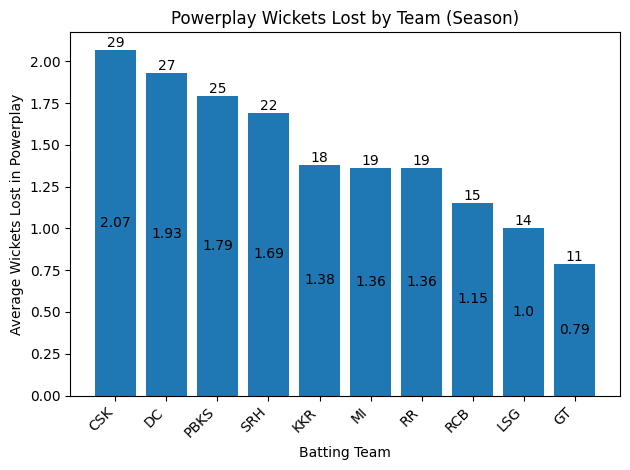

In [73]:
import matplotlib.pyplot as plt

teams = pp_wickets["batting_team"]
avg_wickets = pp_wickets["avg_wickets"]
total_wickets = pp_wickets["total_wickets"]

plt.figure()
bars = plt.bar(teams, avg_wickets)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Batting Team")
plt.ylabel("Average Wickets Lost in Powerplay")
plt.title("Powerplay Wickets Lost by Team (Season)")

for bar, avg_w, total_w in zip(bars, avg_wickets, total_wickets):
    h = bar.get_height()

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h,
        f"{int(total_w)}",
        ha="center",
        va="bottom"
    )

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h * 0.5,
        f"{avg_w}",
        ha="center",
        va="center"
    )

plt.tight_layout()
plt.show()

